In [2]:
import random
from random import shuffle
from random import randint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
#board graphic based on the solution
def board(solution): 
    matrix = np.zeros([len(solution),len(solution)], dtype=int)
    matrix = matrix.tolist()
    for item in solution:
        for i in range(len(solution)):
            if i == item:
                for j in range(len(solution)):
                    if  j == solution.index(item):
                        matrix[i][j] = 1
                        
    l =[]
    for i in range(1, len(solution)+1):
        l.append(i)
    
    plt.figure(figsize=(5,5))
    sns.heatmap(matrix, linewidths=.8,cbar=False,cmap='Set3',xticklabels=l,yticklabels=l)


In [4]:
#number of attacks
def evaluation(state):
    h = 0                
    #check for diagonal attacks
    for i in range(0, len(state)):
        for j in range(0, len(state)):
            if j > i:
               if abs(i - j) == abs(state[i] - state[j]):
                  h += 1
                  #Evaluate each column for detecting attacks
               if abs(state[i] - state[j]) == 0:
                  h += 1 
    return h
    
def neighbor(state): #returns the best neighbor
    # Dictionary with all possible solution for each queen
    neighbors = {}
    #print(self.state)
    for i in range(0, len(state)):
        #print(i)
        for j in range(0, len(state)):
            #print("%d %d" % (i,j))
            if j != state[i]:
                 temp = state.copy()                 
                 temp[i] = j
                 #print(temp)
                 #Generate a new solution list (state)                 
                 #Evaluate the number of attacks (heuristic) for each new state
                 neighbors[(i, j)] = evaluation(temp) #list of neighbors' evaluation value
        
    best_neighbors = {} #Store the best heuristic
    best_h = evaluation(state) #assign current state evaluation to the best evaluation
        
    #Iterate dict itens (i,j)
    # Where i is the key and h the value (number of attacks)
    for i, h in neighbors.items():
        #check if there is a better state than the current state
        if h < best_h: 
           best_h = h
           if len(best_neighbors) > 0:
              # reset the dictionary if a better h is found
              best_neighbors.clear()
           best_neighbors[i] = best_h
        if h == best_h:                
           best_neighbors[i] = best_h

    #if there are more than one better solution then choose one of them randomly
    # It is also possible to choose in a greedy way
    if len(best_neighbors.keys()) > 0: 
       random_index = random.randint(0, len(best_neighbors.keys()) - 1)
       list_neighbors = list(best_neighbors.keys())
       state[list_neighbors[random_index][0]] = list_neighbors[random_index][1]

    return state 

In [5]:
#ANNEALING
def annealing (state, alpha, t0, max):
  iter=0
  t = t0
  while(t > 0.001):
    
    while (iter<max):
      iter+= 1
      #copiar o valor do state p/ s1
      s1= state.copy()
      #mudar aleatoriamente o s1
      shuffle(s1)

      #comparação entre o state e o aleatorio
      delta = evaluation(s1)-evaluation(state)
      if(delta < 0):
        state = s1
      else:
        x = random.random()
        if(x < pow(math.e,(-delta/t))):
          state = s1

    t = t*alpha
    iter=0
  return state 




In [ ]:
#teste p/ verificar o melhor alpha, t0 e num max
while True:
  state = list(range(8))
  random.shuffle(state)
  print(state)

  #argumentos -> state alpha t0 max
  # 0.1 e 10 são 4 vezes o num max
  # 4 * 800 = 3200
  #solution = annealing(state, 0.1, 10, 800)


  # 1 * 3000 = 3000
  solution = annealing(state, 0.1, 0.01, 3000)

  #solution = annealing(state, 0.1, 1000000000000000000000000000, 100)
  print("Solução Final: ",solution," - ataques: ",evaluation(solution))

  if(evaluation(solution)!= 0):
    break

[6, 7, 4, 5, 1, 2, 3, 0]
Solução Final:  [3, 7, 4, 2, 0, 6, 1, 5]  - ataques:  0


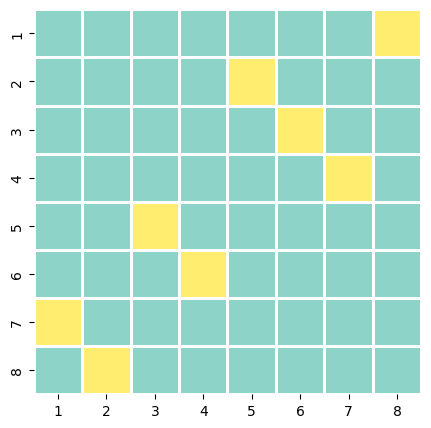

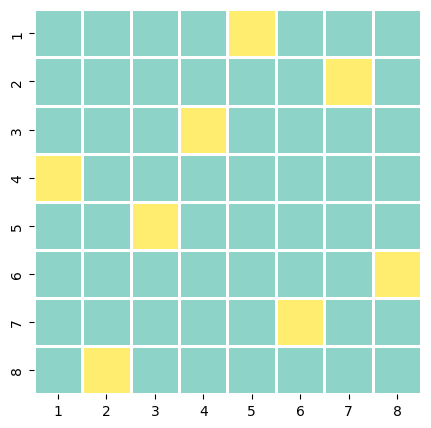

In [12]:
#Final
state = list(range(8))
random.shuffle(state)
print(state)
board(state)
solution = annealing(state, 0.1, 0.01, 3000)
print("Solução Final: ",solution," - ataques: ",evaluation(solution))
board(solution)